In [488]:
# все нужные библиотеки
# можете дополнить список если считаете нужным
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score, r2_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


### Проект:
Заказчик передал вам данные: суммы транзакции клиентов и какие-то признаки<br>
Все данные хранятся в файле train_dataset.csv, где суммы транзакций размещены под колонкой "int_target". Как вы уже догадались это и будет таргет который нам нужно будет предсказать.<br>
Не терпится начать? Мне тоже, но для начала вводная касательно этого проекта, тоже будет интересно.

Хотя перед вами стоит одна задача весь проект будет поделён на несколько подпунктов для вашего удобства.<br>
Каждый из подпунктов будет просить вас выполнить какое-то задание, но как вы его выполните будет зависеть только от вас. Ведь как вы уже
убедились в дата-саинсе, да и в целом питоне много разных подходов для одной проблемы.<br>

В целом вы можете написать полностью свой код, главное в итоге построить модель. А убедиться в том что ваша модель хороша нам поможет Kaggle.<br>
Да-да, в этом проекте вы сможете сдать свои результаты в Kaggle и получить свой балл.<br>
Ну, а теперь пора начинать

1) Для начала импортируйте данные из файла dataset.csv, назовите ваш датасет "dataset"

In [489]:
dataset = pd.read_csv('train_dataset.csv')
dataset

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,int_target
0,-0.043457,-0.027918,1.473594,-10.309556,-1.000000,145.373247,0.001888,2.555947,-64.208613,0.470329,...,B,83.317907,85.385030,120.550153,59.736520,64.325558,107.833753,85.853573,104.466108,17353
1,-1.535978,0.999851,23.019753,38.430092,1.000000,-110.045207,2.359228,0.571917,-110.318854,-2.620978,...,D,114.881621,79.711086,68.505986,116.330797,75.365722,104.229006,90.842232,95.232654,1214
2,11.567708,0.608310,1.873323,6.412821,0.999995,-280.186852,133.811870,1.160380,-206.238816,-1.006502,...,B,145.833459,115.159171,64.417992,98.846694,66.381070,82.118547,96.837671,103.887599,16094
3,9.220074,0.999864,5.041939,-12.692120,-1.000000,164.773793,85.009772,-1.401234,92.624296,2.712139,...,C,98.150579,78.620349,120.176496,104.297092,89.318362,73.791588,71.870016,68.397346,24168
4,-3.025434,-0.594711,5.912259,-14.922129,-1.000000,9.546673,9.153251,-0.157479,-175.895074,-0.832795,...,C,94.519135,123.286154,75.458961,111.831234,111.871202,99.733563,100.697358,97.568328,1105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,-14.855160,-0.444750,5.014003,6.427379,0.999995,-117.145006,220.675766,2.305630,-123.983178,-0.951612,...,D,121.949240,106.327136,101.548759,102.942019,91.144601,108.163022,100.870928,115.264152,11210
8996,3.978782,-0.977872,4.424409,-12.647104,-1.000000,417.490199,15.830708,-3.781737,288.301732,2.492421,...,D,123.045333,106.364483,83.957364,47.059143,87.166297,112.811188,98.509837,123.960286,27497
8997,-12.752882,0.877753,4.595519,-3.167490,-0.996460,-683.322309,162.635990,-1.165655,-270.594836,-3.391237,...,B,123.040231,126.737676,120.916782,113.665833,132.285874,103.250240,96.179067,112.579289,6309
8998,5.848172,-0.113649,14.008038,9.070265,1.000000,-100.800044,34.201116,1.540314,-153.131023,-1.735506,...,D,107.747155,87.938391,115.194858,90.439441,83.195356,115.937584,94.057404,64.427729,20424


2. Сделайте предварительный анализ посмотрите на ваши данные:
сколько их, какого они типа, и какое их примерно распределение

In [490]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   9000 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   9000 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   feature_9   9000 non-null   float64
 9   feature_10  9000 non-null   float64
 10  feature_11  9000 non-null   float64
 11  feature_12  9000 non-null   object 
 12  feature_13  9000 non-null   float64
 13  feature_14  9000 non-null   float64
 14  feature_15  9000 non-null   float64
 15  feature_16  9000 non-null   float64
 16  feature_17  9000 non-null   float64
 17  feature_18  9000 non-null   float64
 18  feature_19  9000 non-null   float64
 19  feature_20  9000 non-null  

In [491]:
train_dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,int_target
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,9.892699,0.051539,13.691801,-5.280291,-0.190470,33.328407,353.997548,0.322612,-69.936887,-0.334325,0.328602,99.738087,99.862703,99.764452,99.958384,100.053203,100.209235,100.150711,99.819907,14962.016000
std,16.005016,0.708241,77.058634,26.814772,0.966878,193.282240,482.976481,1.928390,130.805512,1.802465,1.949699,19.970516,20.059934,19.816391,20.073887,20.005191,19.839667,20.084744,20.072153,8507.039575
min,-55.674815,-1.000000,0.002306,-90.266818,-1.000000,-782.730110,0.000032,-8.785694,-562.750841,-6.678488,-6.817115,23.296434,21.404151,20.462943,31.695377,25.278459,6.108243,29.523073,28.591199,501.000000
25%,-0.590266,-0.652740,0.891789,-24.131903,-1.000000,-88.607265,38.261808,-0.867972,-155.988559,-1.569338,-0.997933,86.416262,86.377084,86.184816,86.146061,86.513425,86.753705,86.684625,86.163540,7461.750000
50%,10.032527,0.108589,2.771781,-6.535842,-0.999996,47.154805,169.202144,0.454511,-80.249681,-0.374527,0.361400,99.753333,99.914720,99.938163,99.956294,99.644334,100.166669,100.179503,99.942090,14878.500000
75%,20.577624,0.750147,8.313018,12.151035,1.000000,165.882796,476.800547,1.636826,10.046369,0.874218,1.690059,113.192601,113.550065,113.274773,113.503300,113.486201,113.389489,113.657307,113.275163,22404.000000
max,71.408515,1.000000,4195.458665,96.967006,1.000000,689.183091,5099.175987,7.563691,454.622574,6.605742,7.314190,169.972815,169.211534,176.896232,180.756967,182.022092,173.917343,171.521586,178.220128,29631.000000


3. Разделите ваш датасет на таргет и признаки, а также поделите ваш датасет на тренировочный и тестовый

In [492]:
X = dataset.drop(columns='int_target')
y = dataset['int_target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

4. Надеюсь вы заметили что у вас есть категориальный признак который имеет текстовый формат.<br>
Переведите этот признак в числовое значение

In [493]:
ohe = OneHotEncoder()
ohe.fit(X_train[['feature_12']])
encoded_dummies = ohe.transform(X_train[['feature_12']]).toarray()
letter_df = pd.DataFrame(data=encoded_dummies, columns=ohe.categories_[0])

X_train = pd.concat([X_train.drop(columns='feature_12').reset_index(drop=True),letter_df.reset_index(drop=True)], axis=1)
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,A,B,C,D
0,7.481288,-0.621111,0.365975,-22.406894,-1.000000,8.071321,55.969667,-3.951800,163.376969,2.359634,...,110.092833,121.702097,112.419686,117.591197,112.197163,81.518098,0.0,1.0,0.0,0.0
1,-6.639949,0.321305,91.748658,-1.135674,-0.812952,-212.562636,44.088925,-0.229419,-314.495346,-4.513478,...,118.417301,57.682672,139.389155,108.342150,82.109601,71.321759,0.0,0.0,0.0,1.0
2,-0.068539,0.877468,2.332762,35.426184,1.000000,148.684951,0.004698,4.533176,-195.454157,-0.107638,...,89.348810,106.523423,89.563554,82.078120,61.423646,93.364040,1.0,0.0,0.0,0.0
3,-13.153799,-0.277369,9.296676,35.284861,1.000000,-280.155695,173.022439,-1.228288,63.201449,-2.746946,...,100.521193,75.542504,84.890731,98.335895,113.260153,83.777477,1.0,0.0,0.0,0.0
4,0.258142,-0.155081,2.315129,-36.509548,-1.000000,-565.874189,0.066637,-2.577882,-317.806128,-5.750660,...,92.039460,103.343087,90.402785,85.903089,116.128298,79.541678,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6295,35.969997,-0.579731,6.600220,-25.830267,-1.000000,118.712790,1293.840711,2.574977,-230.166862,-0.720779,...,107.645588,82.378850,120.982503,101.501698,59.821340,109.328818,0.0,0.0,1.0,0.0
6296,21.926098,-0.967780,0.117870,-60.200588,-1.000000,-10.792241,480.753764,-0.429158,-188.740502,-1.915848,...,73.056221,89.863601,145.860854,104.941625,99.518882,93.564962,1.0,0.0,0.0,0.0
6297,4.514313,0.594046,0.442771,-12.621345,-1.000000,43.741965,20.379018,1.429236,-153.430040,-2.584769,...,52.651375,165.151338,106.096223,103.505150,76.370010,126.091607,0.0,0.0,0.0,1.0
6298,23.093271,0.116338,23.978102,-37.236181,-1.000000,137.937124,533.299163,-1.189263,-152.511979,4.239592,...,85.934900,90.436177,81.827239,124.633488,79.571765,93.651572,0.0,1.0,0.0,0.0


In [494]:
encoded_dummies = ohe.transform(X_test[['feature_12']]).toarray()
letter_df = pd.DataFrame(data=encoded_dummies, columns=ohe.categories_[0])

X_test = pd.concat([X_test.drop(columns='feature_12').reset_index(drop=True),letter_df.reset_index(drop=True)], axis=1)
X_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,A,B,C,D
0,12.139975,0.972215,1.225559,-29.393152,-1.000000,104.635105,147.378984,0.903999,-119.183844,-1.279016,...,67.555370,100.020267,107.875946,111.096964,80.334243,102.326545,1.0,0.0,0.0,0.0
1,12.809551,-0.995736,1.552518,-31.643611,-1.000000,297.396232,164.084588,-0.230031,141.952464,0.414283,...,134.161079,66.595806,111.628488,72.022125,84.896781,73.896306,1.0,0.0,0.0,0.0
2,-15.447792,0.996302,2534.900230,-7.489781,-0.999999,-189.734120,238.634265,-0.864981,-360.168697,-3.131051,...,78.418816,101.171110,99.887853,89.096300,133.108313,92.337140,1.0,0.0,0.0,0.0
3,-9.087532,-0.709435,9.216585,13.691098,1.000000,0.832674,82.583238,0.776995,-148.580538,-2.550770,...,115.610809,120.322321,85.864252,96.723380,58.767282,86.585608,1.0,0.0,0.0,0.0
4,3.910259,0.993540,0.258229,33.863028,1.000000,-162.840730,15.290126,2.320312,-142.978489,-0.627459,...,98.612455,69.822478,102.053852,129.278025,77.703386,85.876347,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,-22.592627,0.197758,17.712984,55.479646,1.000000,23.584790,510.426787,3.506171,-105.175764,-2.204346,...,127.881725,126.773781,89.465228,76.644681,117.992925,100.003308,1.0,0.0,0.0,0.0
2696,-0.701401,-0.736439,16.775381,-13.723723,-1.000000,-289.688748,0.491963,-0.898113,-295.829391,-3.576440,...,71.379909,96.382553,97.314482,77.527466,80.493275,84.113499,1.0,0.0,0.0,0.0
2697,-5.059284,-0.473800,0.964210,10.123624,1.000000,141.004870,25.596360,1.561642,-65.463817,-1.859861,...,100.137791,160.631699,107.201916,106.188314,100.508746,120.214151,1.0,0.0,0.0,0.0
2698,0.453142,-0.965926,45.123782,-0.242285,-0.237653,99.775286,0.205338,-1.867199,-29.950279,2.762947,...,116.826017,78.283789,149.611605,102.507830,50.394631,73.835434,0.0,0.0,1.0,0.0


5. Надеюсь вы заметили что масштабы наших признаков сильно разнятся.<br>
Давайте применим одно единое масштабирование на все наши признаки.

In [496]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,A,B,C,D
0,0.137569,1.295439,-0.204731,-0.898741,-0.838868,0.369032,-0.428200,0.294088,-0.367135,-0.518881,...,-1.631238,0.004941,0.387528,0.560513,-0.984589,0.128029,1.747585,-0.587371,-0.576128,-0.573685
1,0.179214,-1.476413,-0.199215,-0.982370,-0.838868,1.370937,-0.394086,-0.293965,1.630315,0.420016,...,1.726643,-1.661044,0.576198,-1.409101,-0.757630,-1.291725,1.747585,-0.587371,-0.576128,-0.573685
2,-1.578295,1.329365,42.534272,-0.084791,-0.838867,-1.160997,-0.241854,-0.623219,-2.210445,-1.545793,...,-1.083565,0.062302,-0.014095,-0.548457,1.640602,-0.370824,1.747585,-0.587371,-0.576128,-0.573685
3,-1.182709,-1.073159,-0.069935,0.702310,1.229853,-0.170497,-0.560515,0.228230,-0.591992,-1.224040,...,0.791444,1.016861,-0.719170,-0.164005,-2.057415,-0.658045,1.747585,-0.587371,-0.576128,-0.573685
4,-0.374291,1.325475,-0.221048,1.451918,1.229853,-1.021215,-0.697929,1.028520,-0.549142,-0.157607,...,-0.065516,-1.500216,0.094807,1.476951,-1.115458,-0.693464,-0.572218,-0.587371,-0.576128,1.743118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,-2.022679,0.204619,0.073386,2.255212,1.229853,-0.052240,0.313155,1.643449,-0.259986,-1.031956,...,1.410074,1.338423,-0.538121,-1.176095,0.888703,0.012011,1.747585,-0.587371,-0.576128,-0.573685
2696,-0.661120,-1.111195,0.057570,-0.316450,-0.838868,-1.680527,-0.728148,-0.640400,-1.718309,-1.792752,...,-1.438427,-0.176375,-0.143478,-1.131597,-0.976678,-0.781497,1.747585,-0.587371,-0.576128,-0.573685
2697,-0.932166,-0.741268,-0.209139,0.569739,1.229853,0.558069,-0.676884,0.635110,0.043773,-0.840947,...,0.011382,3.026012,0.353640,0.313087,0.018971,1.021303,1.747585,-0.587371,-0.576128,-0.573685
2698,-0.589312,-1.434426,0.535762,0.184533,-0.050326,0.343772,-0.728733,-1.142922,0.315419,1.722298,...,0.852708,-1.078476,2.485902,0.127567,-2.473903,-1.294765,-0.572218,-0.587371,1.735724,-0.573685


6. Постройте модель линейной регрессии.<br>
Оцените модель с помощью метрики RMSE, а также покажите статистические метрики

In [498]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
prediction = model.predict(X_test_scaled)
check_predict = model.predict(X_train_scaled)
print(f"RMSE:{mean_squared_error(y_test, prediction)**(1/2)}")
print(f"RMSE:{mean_squared_error(y_train, check_predict)**(1/2)}")


RMSE:6723.741162781054
RMSE:6737.897307588782


In [499]:
print(f"R2:{r2_score(y_test, prediction)}")

R2:0.368345205817336


### Апдейт задачи
Пришле заказчик и запросил текущий статус. Метрики RMSE ему сильно не понравились, около половины размаха всего таргета.<br>
Вы предпологаете, что задача регрессии слишком комплексна для текущего набора данных.<br>
Вы предложили, поделить таргет на классы, то есть не определять абсолютную сумму транзакций, а определять к какому классу этот клиент относится (высокодоходных, средний или низкодоходный).<br>
Заказчик показать как поделить на эти классы

7. Чтобы поделить таргет на классы давайте сначала посмотрим на распределение этого самого таргета

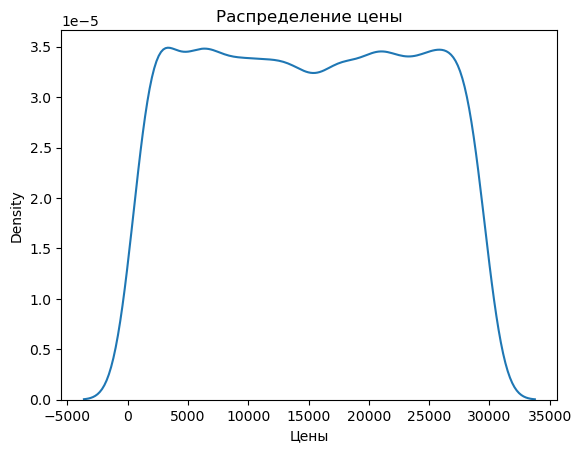

In [500]:
sns.kdeplot(y)
plt.title('Распределение цены')
plt.xlabel('Цены')
plt.show()

8. Думаю вы согласитесь что распределение выглядит равномерным то есть поделить мы можем на три равных класса.<br>
Для этого нам нужно посчитать соответствующие перцентили (33% и 67%)

In [501]:
p1 = np.percentile(y, 33)
p2 = np.percentile(y, 67)

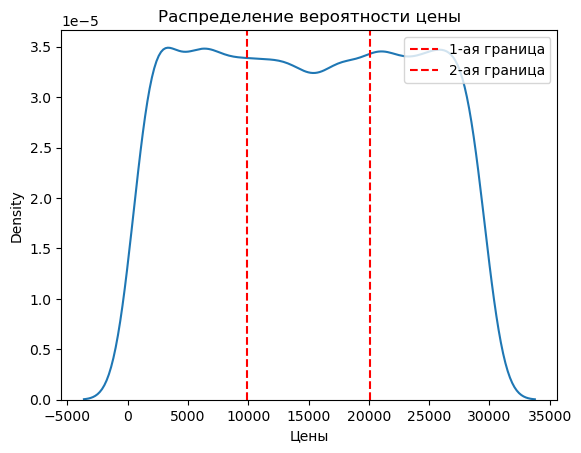

In [502]:
sns.kdeplot(y)
plt.axvline(p1,color='red', linestyle='--', label = '1-ая граница')
plt.axvline(p2, color='red', linestyle='--', label='2-ая граница')
plt.title('Распределение вероятности цены')
plt.xlabel('Цены')
plt.legend(loc='upper right')
plt.show()

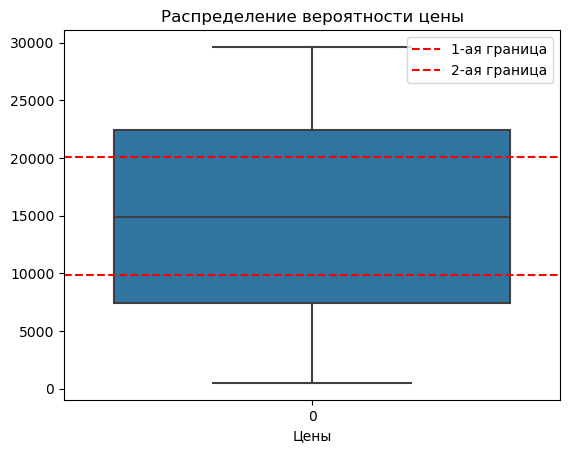

In [503]:
sns.boxplot(y)
plt.axhline(p1,color='red', linestyle='--', label = '1-ая граница')
plt.axhline(p2, color='red', linestyle='--', label='2-ая граница')
plt.title('Распределение вероятности цены')
plt.xlabel('Цены')
plt.legend(loc='upper right')
plt.show()

9. Заказчик согласился на деление по классам по данным перцентире но предложил их округлить.<br>
Поэтому создайте новый таргет, по такой логике, все что ниже 10,000 это низкодоходный, а все что выше 20000 это высокодоходный, остальное соответсвенно средний класс

In [504]:
y_train = pd.cut(y_train, bins=[-float('inf'), 10000, 20000, float('inf')], labels=['Низкодоходный', 'Средний класс', 'Высокодоходный'])
y_train

32      Высокодоходный
7744     Низкодоходный
6769     Низкодоходный
6186     Низкодоходный
8753     Низкодоходный
             ...      
6844    Высокодоходный
48       Средний класс
8964     Средний класс
5944    Высокодоходный
5327    Высокодоходный
Name: int_target, Length: 6300, dtype: category
Categories (3, object): ['Низкодоходный' < 'Средний класс' < 'Высокодоходный']

In [505]:
y_test = pd.cut(y_test, bins=[-float('inf'), 10000, 20000, float('inf')], labels=['Низкодоходный', 'Средний класс', 'Высокодоходный'])
y_test

8266     Средний класс
1814    Высокодоходный
2517     Низкодоходный
7401     Средний класс
448      Низкодоходный
             ...      
4442     Средний класс
1497     Низкодоходный
7981     Низкодоходный
8120    Высокодоходный
3427     Низкодоходный
Name: int_target, Length: 2700, dtype: category
Categories (3, object): ['Низкодоходный' < 'Средний класс' < 'Высокодоходный']

10. Давайте теперь построим модель логистической регрессии она будет служить нам бэйзлайном, а также фильтром признаков.<br>
Для этого постройте модель с Lasso регуляризацией и коефициентом регуляризации 0.01.<br>
Оцените модель используя метрику accuracy

In [506]:
LogReg = LogisticRegression(penalty='l1', C=0.01, solver='liblinear', random_state=21)
LogReg.fit(X_train_scaled, y_train)
predictions = LogReg.predict(X_test_scaled)
print(len(predictions))
print(f"Accuracy:{accuracy_score(y_test, predictions)}")

2700
Accuracy:0.7485185185185185


11. Посмотрите какие получились коэффициенты признаков у нашей модели

In [507]:
coefficients = {X_test.columns[i]: LogReg.coef_[0][i] for i in range(len(X_test.columns))}
coefficients = dict(sorted(coefficients.items(), reverse=True, key=lambda x: x[1]))

print("Коэффициенты признаков:")
for feature, coef in coefficients.items():
    print(f"{feature}:{coef}")

Коэффициенты признаков:
feature_10:0.6639697719764042
feature_9:0.41206085149643024
feature_11:0.1263217012360926
feature_2:0.10799726029060834
feature_1:0.0
feature_3:0.0
feature_4:0.0
feature_6:0.0
feature_13:0.0
feature_14:0.0
feature_15:0.0
feature_16:0.0
feature_17:0.0
feature_18:0.0
feature_19:0.0
feature_20:0.0
A:0.0
B:0.0
C:0.0
D:0.0
feature_7:-0.16030855772903863
feature_5:-0.1848325823695438
feature_8:-0.60319661501091


12. Что ж видимо признаки у которых коэффициенты по всем классам равны нулю нам не особо полезны.<br>
Давайте выберем только те признаки у которых коэффициент не ноль и создадим новый датасет признаков

In [508]:
new_X_train = X_train_scaled[['feature_2','feature_5','feature_7','feature_8','feature_9','feature_10','feature_11']].copy()

In [509]:
new_X_test = X_test_scaled[['feature_2','feature_5','feature_7','feature_8','feature_9','feature_10','feature_11']].copy()

new_X = pd.concat([new_X_train,new_X_test])
new_X = new_X.reset_index(drop=True)
new_X

,feature_2,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11
0,-0.948756,-0.838868,-0.614860,-2.223895,1.794193,1.498670,1.077540
1,0.378634,-0.645393,-0.639121,-0.293648,-1.861087,-2.312319,-1.047726
2,1.161988,1.229853,-0.729143,2.176005,-0.950532,0.130622,0.601304
3,-0.464596,1.229853,-0.375835,-0.811613,1.027943,-1.332816,-1.935481
4,-0.292354,-0.838868,-0.729016,-1.511447,-1.886411,-2.998309,-1.387776
...,...,...,...,...,...,...,...
8995,0.204619,1.229853,0.313155,1.643449,-0.259986,-1.031956,-0.383713
8996,-1.111195,-0.838868,-0.728148,-0.640400,-1.718309,-1.792752,-1.072487
8997,-0.741268,1.229853,-0.676884,0.635110,0.043773,-0.840947,0.291505
8998,-1.434426,-0.050326,-0.728733,-1.142922,0.315419,1.722298,1.588517


13. Давайте посмотрим есть ли какая-то предсказательная способность у оставшихся признаков.<br>
Для этого примените principal component analysis и нарисуйте эти компоненты на графике с таргетом

In [510]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(new_X)
X_pca = pd.DataFrame(data_pca, columns=[i+1 for i in range(len(pca.explained_variance_ratio_))])

new_y = pd.concat([y_train, y_test])
new_y = new_y.reset_index(drop=True)

# print(pca.explained_variance_ratio_)
dataset = pd.concat([X_pca,new_y.rename('target')],axis=1)
# len(data_pca)

9000

In [511]:
trace_pca0 = go.Scatter3d(
    x=data_pca[y==0, 0],
    y=data_pca[y==0, 1],
    z=data_pca[y==0, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        opacity=0.8
    ),
    name='0'
)

trace_pca1 = go.Scatter3d(
    x=data_pca[y==1, 0],
    y=data_pca[y==1, 1],
    z=data_pca[y==1, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='green',
        opacity=0.8
    ),
    name='1'
)

trace_pca2 = go.Scatter3d(
    x=data_pca[y==2, 0],
    y=data_pca[y==2, 1],
    z=data_pca[y==2, 2],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.8
    ),
    name='2'
)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3')
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    legend=dict(x=0, y=1)
)

fig = go.Figure(data=[trace_pca0, trace_pca1, trace_pca2], layout=layout)
fig.show()

14. Видимо что-то есть в этих признаках.<br>
Давайте теперь попробуем построить более комплексную модель, постройте любую модель основную на деревьях.<br>
Так же оцените вашу модель с помощью метрики accuracy

In [512]:
X = dataset.drop(columns='target')
y = dataset['target'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [513]:
model_1 = RandomForestClassifier(n_estimators=250, max_depth=8, max_features=3, random_state=21)
model_1.fit(X_train,y_train)
prediction_1 = model_1.predict(X_test)

print(classification_report(y_test, prediction_1))
print(confusion_matrix(y_test, prediction_1))


# Проверка недообучения и переобучения
train_prediction_1 = model_1.predict(X_train)
print(f"Accuracy (train):{accuracy_score(y_train, train_prediction_1)}")
print(f"Accuracy (test):{accuracy_score(y_test, prediction_1)}")

                precision    recall  f1-score   support

Высокодоходный       0.80      0.66      0.72       900
 Низкодоходный       0.61      0.77      0.68       889
 Средний класс       0.60      0.55      0.57       911

      accuracy                           0.66      2700
     macro avg       0.67      0.66      0.66      2700
  weighted avg       0.67      0.66      0.66      2700

[[590 126 184]
 [ 51 684 154]
 [ 99 312 500]]
Accuracy (train):0.7107936507936508
Accuracy (test):0.6570370370370371


In [420]:
params = {'n_estimators': [200,250,300], 
         'max_depth': [8,9,10,11],
         'max_features':[3,4,'sqrt',5,6,7,8]}

model_1_search = GridSearchCV(cv=3, scoring='accuracy',estimator = model_1, param_grid=params)
model_1_search.fit(X_train, y_train)
model_1_search.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=250, random_state=21)

15. Давайте попробуем применить другой тип модели.<br>
Постройте SVM модель и оцените ее accuracy

In [514]:
model_2 = SVC(kernel='rbf', C=0.2)
model_2.fit(X_train,y_train)
prediction_2 = model_2.predict(X_test)

print(classification_report(y_test, prediction_2))
print(confusion_matrix(y_test, prediction_2))


# Проверка недообучения и переобучения
train_prediction_2 = model_2.predict(X_train)
print(f"Accuracy (train):{accuracy_score(y_train, train_prediction_2)}")
print(f"Accuracy (test):{accuracy_score(y_test, prediction_2)}")

                precision    recall  f1-score   support

Высокодоходный       0.82      0.63      0.71       900
 Низкодоходный       0.60      0.80      0.68       889
 Средний класс       0.60      0.55      0.57       911

      accuracy                           0.66      2700
     macro avg       0.67      0.66      0.66      2700
  weighted avg       0.67      0.66      0.66      2700

[[567 142 191]
 [ 46 709 134]
 [ 78 336 497]]
Accuracy (train):0.6644444444444444
Accuracy (test):0.6566666666666666


In [515]:
params = {'degree': range(3, 9),
          'C': [0.1, 0.01, 0.05, 0.15, 0.2, 0.25, 1, 10]}

model_2 = SVC(kernel='rbf')
model_2_search = GridSearchCV(estimator=model_2, param_grid=params, scoring='accuracy', cv=3)
model_2_search.fit(X_train, y_train)
model_2_search.best_estimator_

KeyboardInterrupt: 

15. Давайте попробуем применить другой тип модели.<br>
Постройте KNN модель и оцените ее accuracy

In [516]:
model_3 = KNeighborsClassifier(n_neighbors=19)
model_3.fit(X_train,y_train)
prediction_3 = model_3.predict(X_test)

print(classification_report(y_test, prediction_3))
print(confusion_matrix(y_test, prediction_3))


# Проверка недообучения и переобучения
train_prediction_3 = model_3.predict(X_train)
print(f"Accuracy (train):{accuracy_score(y_train, train_prediction_3)}")
print(f"Accuracy (test):{accuracy_score(y_test, prediction_3)}")

                precision    recall  f1-score   support

Высокодоходный       0.77      0.66      0.71       900
 Низкодоходный       0.62      0.72      0.66       889
 Средний класс       0.58      0.57      0.57       911

      accuracy                           0.65      2700
     macro avg       0.65      0.65      0.65      2700
  weighted avg       0.65      0.65      0.65      2700

[[594 120 186]
 [ 61 640 188]
 [120 276 515]]
Accuracy (train):0.6782539682539682
Accuracy (test):0.6477777777777778


In [ ]:
params = {'n_neighbors': range(2, 21)}

model_3_search = GridSearchCV(estimator=model_3, param_grid=params, scoring='accuracy', cv=3)
model_3_search.fit(X_train, y_train)
model_3_search.best_estimator_

### Отправляем работы
Ну чтож думаю вы попробовали разные модели, надеюсь вы находили лучшие гиперпараметры, ведь пора соревноваться в результатах.<br>
Для этого вам нужно скачать 'test_dataset.csv'<br>
Применить все преобразования что вы делали на стадии обучения модели<br>
Выбрать вашу лучшую модель и сделать предсказания классов для этого датасета<br>
Внимание ваш результат должен быть csv файлом состоящим из двух колонок: ID (от 0 до 999) и cat_target (ваши прогнозы 0/1/2)
Отправить свои результаты вы можете на соревнование Kaggle по ссылке: https://www.kaggle.com/t/6fcb93642fe949aa9c6fb7875fb1b64e<br>


In [423]:
test_dataset = pd.read_csv('test_dataset.csv')

In [424]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   1000 non-null   float64
 1   feature_2   1000 non-null   float64
 2   feature_3   1000 non-null   float64
 3   feature_4   1000 non-null   float64
 4   feature_5   1000 non-null   float64
 5   feature_6   1000 non-null   float64
 6   feature_7   1000 non-null   float64
 7   feature_8   1000 non-null   float64
 8   feature_9   1000 non-null   float64
 9   feature_10  1000 non-null   float64
 10  feature_11  1000 non-null   float64
 11  feature_12  1000 non-null   object 
 12  feature_13  1000 non-null   float64
 13  feature_14  1000 non-null   float64
 14  feature_15  1000 non-null   float64
 15  feature_16  1000 non-null   float64
 16  feature_17  1000 non-null   float64
 17  feature_18  1000 non-null   float64
 18  feature_19  1000 non-null   float64
 19  feature_20  1000 non-null   

In [425]:
test_dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.275898,0.083590,14.781464,-5.103174,-0.175560,35.546791,395.146833,0.244976,-62.134394,-0.302588,0.279429,99.423265,99.785850,99.713034,100.242626,99.544077,99.179285,100.197155,99.923452
std,17.024764,0.699090,63.747303,27.838205,0.972098,200.154398,567.211334,1.901299,131.758839,1.828307,1.956487,20.217345,19.850082,20.004316,19.340665,20.097986,19.970501,19.903435,20.715184
min,-32.998136,-0.999996,0.013135,-87.040525,-1.000000,-731.178547,0.000832,-6.232549,-465.439273,-6.952578,-4.872849,35.405191,41.842558,42.838580,36.657527,27.037081,34.021169,42.103722,22.571941
25%,-1.466410,-0.605411,0.811204,-24.403023,-1.000000,-95.624311,47.682440,-0.946262,-154.169842,-1.568949,-1.087223,85.693112,86.033167,86.183416,87.116512,86.657464,85.752653,86.299932,85.772903
50%,10.124977,0.149983,2.708390,-6.174812,-0.999991,45.417797,186.241638,0.334258,-67.470022,-0.243323,0.365366,99.237982,99.284648,99.393851,100.515718,98.927286,99.603307,100.259343,99.481792
75%,21.184218,0.780764,10.056218,14.147157,1.000000,173.955825,522.081465,1.628554,22.969762,0.999285,1.616668,112.233630,112.639853,112.237827,113.623836,113.715773,112.885414,113.858499,113.784307
max,77.058768,0.999999,1304.408476,83.199122,1.000000,653.795745,5938.053790,5.935216,362.458463,4.691111,5.536655,174.913210,172.699698,176.225539,160.358375,159.728383,167.922173,168.662451,163.845028


In [426]:
ohe = OneHotEncoder()
ohe.fit(test_dataset[['feature_12']])
encoded_dummies = ohe.transform(test_dataset[['feature_12']]).toarray()
letter_df = pd.DataFrame(data=encoded_dummies, columns=ohe.categories_[0])

X = pd.concat([test_dataset.drop(columns='feature_12').reset_index(drop=True),letter_df.reset_index(drop=True)], axis=1)
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,A,B,C,D
0,3.629075,0.817774,0.129687,6.219642,0.999992,-58.751555,13.170185,-2.265941,163.600359,-0.590149,...,75.750290,82.670555,88.398872,78.034384,124.881643,130.904343,1.0,0.0,0.0,0.0
1,-23.283759,-0.086293,0.508258,-9.114238,-1.000000,39.000794,542.133433,3.903423,-35.206871,0.184453,...,98.946475,93.449254,80.750636,70.362057,118.437830,88.459522,0.0,0.0,0.0,1.0
2,2.842355,-0.987547,1.525673,-10.430008,-1.000000,-92.206528,8.078982,0.329318,-180.770230,-0.204815,...,105.507571,135.199911,101.494074,105.644610,101.121831,93.372128,0.0,1.0,0.0,0.0
3,-22.069979,-0.158082,7.572780,3.447535,0.997977,-173.333256,487.083984,2.533396,-146.763360,-1.238702,...,80.176218,142.513692,127.017116,88.508838,118.327166,91.573769,0.0,1.0,0.0,0.0
4,-7.702941,0.421435,0.407912,-6.168170,-0.999991,84.132138,59.335303,-1.125035,153.894943,-0.039970,...,95.847169,114.405540,117.925669,115.024795,104.837486,115.718165,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-2.663239,-0.223853,33.472430,16.086986,1.000000,18.228466,7.092843,2.649379,-39.921707,-0.926307,...,91.519551,104.794370,116.706345,62.217297,118.823683,139.240398,0.0,1.0,0.0,0.0
996,1.317451,0.994101,3.530449,-3.874256,-0.999138,100.893614,1.735677,-2.494048,137.326633,1.914185,...,84.878646,144.213002,76.501124,96.763622,67.162276,98.525074,0.0,1.0,0.0,0.0
997,13.163965,-0.935263,0.263098,-28.167530,-1.000000,534.349898,173.289979,1.196989,113.536825,1.373345,...,87.384047,124.130879,84.225860,89.902456,86.701982,64.882519,0.0,0.0,0.0,1.0
998,0.348878,-0.368382,3.423378,1.700794,0.935508,-307.180236,0.121716,-0.028946,-296.285723,-4.491830,...,94.483509,104.724683,69.614208,87.476586,99.580394,105.429492,0.0,1.0,0.0,0.0


In [427]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,A,B,C,D
0,-0.390616,1.050725,-0.229957,0.406940,1.209899,-0.471364,-0.673766,-1.321293,1.714099,-0.157362,...,-1.198478,-0.909010,-0.554821,-1.059337,1.240833,1.496313,1.644294,-0.574271,-0.546536,-0.580429
1,-1.972212,-0.243127,-0.224015,-0.144157,-0.848529,0.017265,0.259269,1.925146,0.204472,0.266522,...,-0.038339,-0.351424,-0.935559,-1.443712,0.916917,-0.553684,-0.608164,-0.574271,-0.546536,1.722862
2,-0.436850,-1.532953,-0.208047,-0.191446,-0.848529,-0.638593,-0.682746,0.044383,-0.900852,0.053504,...,0.289809,1.808354,0.097073,0.323906,0.046481,-0.316415,-0.608164,1.741338,-0.546536,-0.580429
3,-1.900882,-0.345868,-0.113139,0.307311,1.207824,-1.044117,0.162167,1.204211,-0.642623,-0.512268,...,-0.977119,2.186699,1.367639,-0.534578,0.911354,-0.403272,-0.608164,1.741338,-0.546536,-0.580429
4,-1.056569,0.483506,-0.225590,-0.038276,-0.848520,0.242861,-0.592336,-0.720926,1.640402,0.143712,...,-0.193348,0.732653,0.915056,0.793843,0.233259,0.762852,-0.608164,1.741338,-0.546536,-0.580429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.760399,-0.439996,0.293351,0.761571,1.209907,-0.086568,-0.684486,1.265243,0.168670,-0.341316,...,-0.409791,0.235464,0.854357,-1.851755,0.936313,1.898927,-0.608164,1.741338,-0.546536,-0.580429
996,-0.526464,1.303074,-0.176582,0.044167,-0.847641,0.326645,-0.693935,-1.441327,1.514592,1.213080,...,-0.741930,2.274605,-1.147104,-0.121022,-1.660588,-0.067539,-0.608164,1.741338,-0.546536,-0.580429
997,0.169724,-1.458127,-0.227863,-0.828929,-0.848529,2.493339,-0.391332,0.500968,1.333946,0.917117,...,-0.616625,1.235749,-0.762558,-0.464759,-0.678372,-1.692404,-0.608164,-0.574271,-0.546536,1.722862
998,-0.583385,-0.646838,-0.178263,0.244533,1.143531,-1.713170,-0.696782,-0.144143,-1.778010,-2.292470,...,-0.261551,0.231859,-1.489943,-0.586292,-0.031003,0.265930,-0.608164,1.741338,-0.546536,-0.580429


In [429]:
result = LogReg.predict(X_scaled)
result

array(['Высокодоходный', 'Средний класс', 'Низкодоходный',
       'Средний класс', 'Высокодоходный', 'Средний класс',
       'Низкодоходный', 'Средний класс', 'Средний класс', 'Средний класс',
       'Низкодоходный', 'Средний класс', 'Средний класс',
       'Высокодоходный', 'Низкодоходный', 'Средний класс',
       'Высокодоходный', 'Низкодоходный', 'Высокодоходный',
       'Средний класс', 'Высокодоходный', 'Высокодоходный',
       'Низкодоходный', 'Средний класс', 'Средний класс',
       'Высокодоходный', 'Низкодоходный', 'Высокодоходный',
       'Высокодоходный', 'Средний класс', 'Средний класс',
       'Высокодоходный', 'Средний класс', 'Высокодоходный',
       'Высокодоходный', 'Низкодоходный', 'Низкодоходный',
       'Средний класс', 'Средний класс', 'Низкодоходный', 'Низкодоходный',
       'Высокодоходный', 'Средний класс', 'Средний класс',
       'Низкодоходный', 'Высокодоходный', 'Высокодоходный',
       'Низкодоходный', 'Средний класс', 'Высокодоходный',
       'Высокодоходны

In [432]:
data = {
    "ID": range(1000),
    "cat_target": result}
df = pd.DataFrame(data)

replacement = {'Низкодоходный': 0, 'Средний класс': 1, 'Высокодоходный': 2}
df['cat_target'] = df['cat_target'].replace(replacement)

df.to_csv("results.csv", index=False)

In [518]:
coefficients = {X_scaled.columns[i]: LogReg.coef_[0][i] for i in range(len(X_scaled.columns))}
coefficients = dict(sorted(coefficients.items(), reverse=True, key=lambda x: x[1]))

print("Коэффициенты признаков:")
for feature, coef in coefficients.items():
    print(f"{feature}:{coef}")

Коэффициенты признаков:
feature_10:0.6639697719764042
feature_9:0.41206085149643024
feature_11:0.1263217012360926
feature_2:0.10799726029060834
feature_1:0.0
feature_3:0.0
feature_4:0.0
feature_6:0.0
feature_13:0.0
feature_14:0.0
feature_15:0.0
feature_16:0.0
feature_17:0.0
feature_18:0.0
feature_19:0.0
feature_20:0.0
A:0.0
B:0.0
C:0.0
D:0.0
feature_7:-0.16030855772903863
feature_5:-0.1848325823695438
feature_8:-0.60319661501091


In [520]:
new_X = X_scaled[['feature_2','feature_5','feature_7','feature_8','feature_9','feature_10','feature_11']].copy()
new_X

,feature_2,feature_5,feature_7,feature_8,feature_9,feature_10,feature_11
0,1.050725,1.209899,-0.673766,-1.321293,1.714099,-0.157362,0.738924
1,-0.243127,-0.848529,0.259269,1.925146,0.204472,0.266522,0.037309
2,-1.532953,-0.848529,-0.682746,0.044383,-0.900852,0.053504,-0.474549
3,-0.345868,1.207824,0.162167,1.204211,-0.642623,-0.512268,-0.179864
4,0.483506,-0.848520,-0.592336,-0.720926,1.640402,0.143712,-1.391114
...,...,...,...,...,...,...,...
995,-0.439996,1.209907,-0.684486,1.265243,0.168670,-0.341316,-0.785778
996,1.303074,-0.847641,-0.693935,-1.441327,1.514592,1.213080,1.224634
997,-1.458127,-0.848529,-0.391332,0.500968,1.333946,0.917117,0.372058
998,-0.646838,1.143531,-0.696782,-0.144143,-1.778010,-2.292470,1.756283


In [525]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(new_X)
X_pca = pd.DataFrame(data_pca, columns=[i+1 for i in range(len(pca.explained_variance_ratio_))])

print(pca.explained_variance_ratio_)s

[0.27170705 0.1803119  0.15301411]


In [527]:
prediction_1 = model_1.predict(X_pca)


data = {
    "ID": range(1000),
    "cat_target": prediction_1}
df = pd.DataFrame(data)

replacement = {'Низкодоходный': 0, 'Средний класс': 1, 'Высокодоходный': 2}
df['cat_target'] = df['cat_target'].replace(replacement)

df.to_csv("results_1.csv", index=False)